# Analysis aimed at quantifying "visual sweeping" behavior
### "Visual sweeping" sometimes observed during experiments
### Could be a behavioral correlate of a comparison of the two landmarks

In [1]:
import numpy as np
import pandas as pd 
import scipy.stats as sts

import warnings

from os import mkdir, walk, getcwd
from os.path import sep
from sys import path, exit
from glob import glob

import matplotlib.pyplot as plt
import matplotlib.colors as colors

from Tkinter import Tk
from tkFileDialog import askdirectory, askopenfilename

# Set path to analysis code directory
codeDir = sep.join(getcwd().split(sep)[:-2])
path.insert(1, codeDir)

from plottingUtilities.basicPlotting import myAxisTheme,_myAccentList
from trajectoryAnalysis.trajectoryDerivedParams import relationToObject
from plottingUtilities.objectPreferencePlots import landmarksInSquareTile, countvisits



# Choose files to analyse ..............................................................................................

baseDir = '/Volumes/jayaramanlab/Hannah/Projects/FlyVR/1_Experiments/twoObjOpto'

root = Tk()
root.withdraw()
# choose experiment folder
dataDir = askdirectory(initialdir=baseDir,
                       title='Select experiment directory (containing directories for multiple flies)') + sep
root.update()
root.destroy()
expDirs = sorted(walk(dataDir).next()[1])

analysisDir = sep.join(dataDir.split(sep)[:-2]) + sep + 'analysis' + sep

try:
    expDirs.remove('virtualWorld')
except:
    print('You selected an invalid data directory.\n' +
          'Expected folder structure of the selected path is some/path/to/experimentName/flyGender/rawData/')
    exit(1)

print('\n Analysing the following folders:\n')
print(expDirs)


 Analysing the following folders:

['m01', 'm02', 'm03', 'm04', 'm05', 'm06', 'm07', 'm08', 'm09', 'm10', 'm11', 'm12', 'm13', 'm14', 'm15', 'm16', 'm17', 'm18', 'm19', 'm20', 'm21', 'm22', 'm23', 'm24', 'm25']


In [2]:
# Uncomment, if you want to select a specific subset of flies (e.g. good learners..)
#from operator import itemgetter
#my_indices = [0, 3, 6, 7, 10, 12, 16, 18, 20, 24] # [0, 2, 3, 7, 9, 12, 13, 14, 16, 22] 
#expDirs = itemgetter(*my_indices)(expDirs)

selectionTag = ''#'_top10'  # chose small string, to specify dataset (e.g. top5 flies)

dirName = 'reorientAtLM'

try:
    mkdir(analysisDir + dirName)
except:
    print('Plot directory already exists')

Plot directory already exists


In [3]:
%matplotlib inline 

### Compose mutli-fly data into dataframe

In [4]:
# generate fly color map
numFlies = len(expDirs)
cNorm  = colors.Normalize(vmin=0, vmax=numFlies)

mycmap = colors.LinearSegmentedColormap.from_list('myAccent',_myAccentList, N=256, gamma=1.0)
flyCMap = plt.cm.ScalarMappable(norm=cNorm,cmap=mycmap)

In [5]:
expDir = dataDir + expDirs[0] + sep
FODataFiles = [filepath.split(sep)[-1] for filepath in glob(expDir + '*.txt')]

In [6]:
genotype = expDir.split(sep)[-7]
group = expDir.split(sep)[-4]
print(genotype)
print(group)

HC_x_10xChrimsonR
male


In [7]:
keylist = ['headingAngle','rotVelo','time','transVelo',
           'xPos','xPosInMiniarena','yPos','yPosInMiniarena','rEvents']

keylistLong = ['flyID','trial','trialtype','reinforcement','group','moving'] + keylist
FOAllFlies_df = pd.DataFrame(data=np.zeros((0,len(keylistLong))), columns=keylistLong)

nTrialsPr = 0
nTrialsTr = 0
nTrialsPo = 0
 
vTransTH = 2 #mm/s

# Go through directories of experiments with different flies ...............................................
for currExpDir in expDirs:

    expDir = dataDir + currExpDir + sep
    print('\n Analysing the following folder:\n')
    print(expDir)

    FODataFiles = [filepath.split(sep)[-1] for filepath in glob(expDir + '*.txt')]
    FODataFiles = sorted(FODataFiles)

    print('\n Analysing the following log files:\n')
    print(FODataFiles)

    # Run single trial analysis on each file in folder .....................................................
    for fileToAnalyse in FODataFiles:
        
        flyID = fileToAnalyse.split('_')[8] #6
        trial = FODataFiles.index(fileToAnalyse) + 1
        
        print('Loading saved *.npy file.')
        FODatLoad = np.load(expDir + fileToAnalyse[:-3] + 'npy')[()]

        # Split into visible object trials and invisible object trials
        if 'train' in fileToAnalyse:
            trialtype = 'train'
            rZones = 'on'
            nTrialsTr += 1
        elif 'pre' in fileToAnalyse:
            trialtype = 'pre'
            rZones = 'off'
            nTrialsPr += 1
        else:
            trialtype = 'post'
            rZones = 'off'
            nTrialsPo += 1
        
        vTrans = np.copy(FODatLoad['transVelo'])
        moving = vTrans >= vTransTH

        FODatLoad_df = pd.DataFrame.from_dict(FODatLoad,orient='columns')
        FODatLoad_df.insert(0, 'flyID', flyID)
        FODatLoad_df.insert(1, 'trial', trial)
        FODatLoad_df.insert(2, 'trialtype', trialtype)
        FODatLoad_df.insert(3, 'reinforcement', rZones)
        FODatLoad_df.insert(4, 'group', group)
        FODatLoad_df.insert(5, 'moving', moving)
        
        FOAllFlies_df = FOAllFlies_df.append(FODatLoad_df)


 Analysing the following folder:

/Volumes/jayaramanlab/Hannah/Projects/FlyVR/1_Experiments/twoObjOpto/HC_x_10xChrimsonR/baseline10/antiCyli/male/rawData/m01/

 Analysing the following log files:

['twoObjectForest_1cm4cmConez1_08cm3cmCyliz2R_6cmGrid_8d_5h_10xChrR-HC-Ret_10bl_m01_post_out_161126171710.txt', 'twoObjectForest_1cm4cmConez1_08cm3cmCyliz2R_6cmGrid_8d_5h_10xChrR-HC-Ret_10bl_m01_pre_out_161126164545.txt', 'twoObjectForest_1cm4cmConez1_08cm3cmCyliz2R_6cmGrid_8d_5h_10xChrR-HC-Ret_10bl_m01_train_out_161126165636.txt']
Loading saved *.npy file.
Loading saved *.npy file.
Loading saved *.npy file.

 Analysing the following folder:

/Volumes/jayaramanlab/Hannah/Projects/FlyVR/1_Experiments/twoObjOpto/HC_x_10xChrimsonR/baseline10/antiCyli/male/rawData/m02/

 Analysing the following log files:

['twoObjectForest_1cm4cmConez1_08cm3cmCyliz2R_6cmGrid_8d_6h_10xChrR-HC-Ret_10bl_m02_post_out_161126181113.txt', 'twoObjectForest_1cm4cmConez1_08cm3cmCyliz2R_6cmGrid_8d_6h_10xChrR-HC-Ret_10bl_m

Loading saved *.npy file.
Loading saved *.npy file.

 Analysing the following folder:

/Volumes/jayaramanlab/Hannah/Projects/FlyVR/1_Experiments/twoObjOpto/HC_x_10xChrimsonR/baseline10/antiCyli/male/rawData/m15/

 Analysing the following log files:

['twoObjectForest_1cm4cmConez1_08cm3cmCyliz2R_6cmGrid_9d_10h_10xChrR-HC-Ret_10bl_m15_post_out_161209212359.txt', 'twoObjectForest_1cm4cmConez1_08cm3cmCyliz2R_6cmGrid_9d_10h_10xChrR-HC-Ret_10bl_m15_pre_out_161209205248.txt', 'twoObjectForest_1cm4cmConez1_08cm3cmCyliz2R_6cmGrid_9d_10h_10xChrR-HC-Ret_10bl_m15_train_out_161209210316.txt']
Loading saved *.npy file.
Loading saved *.npy file.
Loading saved *.npy file.

 Analysing the following folder:

/Volumes/jayaramanlab/Hannah/Projects/FlyVR/1_Experiments/twoObjOpto/HC_x_10xChrimsonR/baseline10/antiCyli/male/rawData/m16/

 Analysing the following log files:

['twoObjectForest_1cm4cmConez1_08cm3cmCyliz2R_6cmGrid_6-8d_7h_10xChrR-HC-Ret_10bl_m16_post_out_170131223624.txt', 'twoObjectForest_1cm4cm

In [13]:
FOAllFlies_df = FOAllFlies_df[keylistLong]

FOAllFlies_df['flyID'] = FOAllFlies_df['flyID'].astype('category')
FOAllFlies_df['trial'] = FOAllFlies_df['trial'].astype('category')
FOAllFlies_df['trialtype'] = FOAllFlies_df['trialtype'].astype('category')
FOAllFlies_df['reinforcement'] = FOAllFlies_df['reinforcement'].astype('category')

FOAllFlies_df.head()

,flyID,trial,trialtype,reinforcement,group,moving,headingAngle,rotVelo,time,transVelo,xPos,xPosInMiniarena,yPos,yPosInMiniarena,rEvents
0,m01,1.0,post,off,male,0.0,-0.000004,0.000000,0.000000,0.000000,60.622000,60.622000,35.000000,35.000000,10.0
1,m01,1.0,post,off,male,0.0,-0.000004,0.235672,0.050005,0.793497,60.622000,60.622000,35.000000,35.000000,10.0
2,m01,1.0,post,off,male,0.0,0.011781,0.157064,0.100010,1.588667,60.591600,60.591600,34.974500,34.974500,10.0
3,m01,1.0,post,off,male,1.0,0.019635,-1.570639,0.150015,3.968839,60.531108,60.531108,34.923006,34.923006,10.0
4,m01,1.0,post,off,male,1.0,-0.058905,-3.298343,0.200020,4.234325,60.375600,60.375600,34.799700,34.799700,10.0


In [14]:
flyIDallarray = np.asarray(FOAllFlies_df['flyID']).squeeze()
flyIDs = sorted(list(set(flyIDallarray.tolist())))

### Define structure of trials in terms of closed-loop optogenetic stimulation and presence of landmark cues

In [10]:
# Two object reinforcement test
trialName = ['pre','train','post']
gridSize = 60.0

fps = 20.

In [21]:
visitRad = 15

LMnames = ['Cone','Cylinder']
numLM = len(LMnames)

coneCoords = [[gridSize/2, gridSize/2],
              [3*gridSize/2, -gridSize/2]]
cyliCoords = [[gridSize/2, -gridSize/2],
              [3*gridSize/2, gridSize/2]]

LMcoords = [coneCoords,cyliCoords]


# Settings for plots
LMcols = ['mediumseagreen', 'mediumorchid']
LMmarker = ['^','s']
LMarkerS = [8, 6]
trialColors = ['darkseagreen', 'darkviolet','teal']
trialMarkers = ['d','*','o']

In [22]:
# Colormap for zones
cNorm  = colors.Normalize(vmin=0, vmax=(nedgesR-1)*(nedgesA-1))
locCMap_l = plt.cm.ScalarMappable(norm=cNorm,cmap='RdPu_r')
locCMap_c = plt.cm.ScalarMappable(norm=cNorm,cmap='Greens_r')

### 2D (cartesian) residency  – check if data seemed to have loaded correctly

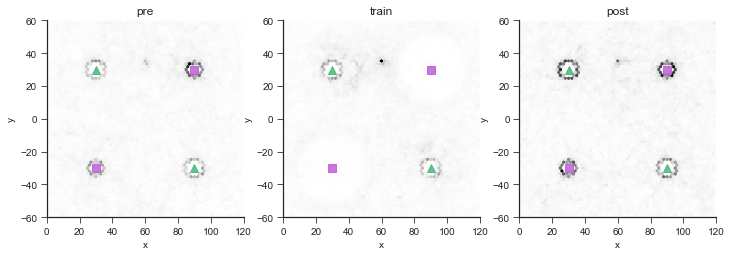

In [23]:
# plot parameter
numBins = 60

hexplotfig = plt.figure(figsize=(12,4))
for trial, condition in enumerate(trialName):
    querystring = '(trialtype == "' + condition + '") & (moving > 0)'
    xPosMA = np.asarray(FOAllFlies_df.query(querystring)['xPosInMiniarena']).squeeze()
    yPosMA = np.asarray(FOAllFlies_df.query(querystring)['yPosInMiniarena']).squeeze()
    ax = hexplotfig.add_subplot(1,len(trialName),trial+1)
    ax.hexbin(xPosMA, yPosMA, gridsize=numBins, cmap='Greys',linewidths=0)
    plt.xlabel('x'); plt.ylabel('y')
    
    landmarksInSquareTile(ax, LMcoords, LMcols)
            
    ax.set_title(trialName[trial])
    ax.set_xlim(0,120)
    ax.set_ylim(-60,60)

## Compute visits counts to be used as measure of learning

In [28]:
visitFreq = np.nan*np.ones((numLM, len(flyIDs), len(trialName)))
visitCount = np.nan*np.ones((numLM, len(flyIDs), len(trialName)))
visitLength = np.zeros((numLM, len(flyIDs), len(trialName)))

for fly in range(len(flyIDs)):
    for trial in range(len(trialName)):
        trialtype =trialName[trial]

        querystring = '(trialtype=="' + trialtype + '") & (flyID == "'+flyIDs[fly]+'")'
        xtrial = FOAllFlies_df.query(querystring)['xPosInMiniarena'].values.squeeze()
        ytrial = FOAllFlies_df.query(querystring)['yPosInMiniarena'].values.squeeze()
        time = FOAllFlies_df.query(querystring)['time'].values.squeeze()

        # compute distance to closest landmark for each type
        dist2closest = np.nan*np.ones( (numLM, len(xtrial)) )
        
        for obj in range(numLM):
            dist2closest[obj,:] = np.minimum( np.hypot((xtrial-LMcoords[obj][0][0]),(ytrial-LMcoords[obj][0][1])),
                                           np.hypot((xtrial-LMcoords[obj][1][0]),(ytrial-LMcoords[obj][1][1])) )
            
            entries,exits,visitT,entryTime,exitTime = countvisits(dist2closest[obj,:],time,visitRad)
        
            visitFreq[obj,fly,trial] = np.sum(entries)/(time[-1]/60.0)
            visitCount[obj,fly,trial] = np.sum(entries)
            visitLength[obj,fly,trial] = np.sum(visitT)

/Users/haberkernh/anaconda3/envs/py2.7/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in minimum
/Users/haberkernh/Documents/code/plottingUtilities/objectPreferencePlots.py:32: RuntimeWarning: invalid value encountered in less
  inside = (dist2Obj < visitRad).astype('int')


In [30]:
# minimum amount of visits to any landmark in any trial to be considered in ananlysis
minVisit = 5

notEnoughVisits = np.where(np.sum((visitCount[0][:,:] + visitCount[1][:,:])> minVisit, axis=1)<3)[0]
keepflies = list(np.where(np.sum((visitCount[0][:,:] + visitCount[1][:,:])> minVisit, axis=1)>=3)[0])

# Sort flies to keep according to preference in post
postPref = list(np.argsort(visitCount[0][:,2]-visitCount[1][:,2]))

print('Out of {} measured flies, {} made less than {} landmark visits in at least one of the three trials ({}%).\n').format(numFlies,
     len(notEnoughVisits), minVisit, 100*len(notEnoughVisits)/numFlies)
print('Flies that did not make enough visits:')
print(notEnoughVisits)
print('The remaining {} flies sorted according to their preference in the post trial (low to high)').format(len(keepflies))
print(postPref)

Out of 25 measured flies, 3 made less than 5 landmark visits in at least one of the three trials (12%).

Flies that did not make enough visits:
[ 4  5 21]
The remaining 22 flies sorted according to their preference in the post trial (low to high)
[4, 1, 24, 8, 17, 19, 20, 18, 15, 11, 23, 21, 6, 10, 14, 7, 0, 3, 5, 12, 2, 13, 9, 22, 16]


In [32]:
top10 = list(set(postPref[-13:]).intersection(set(keepflies)))
print('Selected {} flies:').format(len(top10))
print(top10)

Selected 12 flies:
[0, 2, 3, 6, 7, 9, 10, 12, 13, 14, 16, 22]


## Construct data frame with relevant data in triangel tile coordinate system

In [33]:
def project2triangleTile(x, y, angle, gridSize):
    """ Function to perform projection from square tile to triangle tile. 
        
        Square tile: square zone with 120 mm side length, centered on the center of 
        the square formed by 4 landmarks.
        
        Triangle tile: triangular zone defined by one cone, one cylinder and the center of 
        the square formed by 4 landmarks. The center is positioned at (0,0) and the two 
        landmarks on the right (positive x) of the center position.
    """
    
    warnings.warn("deprecated", DeprecationWarning)
    
    slct = np.arange(0,len(x)) #~np.isnan(x)
    xt = x[slct]
    yt = y[slct]
    anglet = angle[slct]
    
    # (1) cyclic shift of big square ("miniarena")
    yt = (yt + gridSize*1.5)%(gridSize*2)
    
    # (2) cross-project top 2 squares
    leftsquare = np.logical_and(yt > gridSize, xt <= gridSize)
    rightsquare = np.logical_and(yt > gridSize, xt > gridSize)
    
    yt[leftsquare] = yt[leftsquare] - gridSize
    yt[rightsquare] = yt[rightsquare] - gridSize
    
    xt[leftsquare] = xt[leftsquare] + gridSize
    xt[rightsquare] = xt[rightsquare] - gridSize
    
    # (3) flip over the edges of the rectangle parallal to y-axis --> y unchanged, correct heading angle
    tempx = xt.copy()

    xt[tempx < gridSize/2] = abs(gridSize/2 - xt[tempx < gridSize/2]) + gridSize/2
    xt[tempx >= gridSize*1.5] = gridSize*1.5 - abs(gridSize*1.5 - xt[tempx >= gridSize*1.5])
    
    xt = xt - gridSize/2
    
    # recompute angle from flipped vector
    
    #rotate and flip, rotate back
    anglet[tempx < gridSize/2] = -(np.mod(anglet[tempx < gridSize/2] + 1.5*np.pi, 2*np.pi) - np.pi) - 0.5*np.pi
    anglet[tempx >= gridSize*1.5] = -(np.mod(anglet[tempx >= gridSize*1.5] + 1.5*np.pi, 2*np.pi) - np.pi) - 0.5*np.pi

    #correct range
    angrg = anglet < -np.pi
    anglet[np.logical_and(tempx < gridSize/2, angrg)] = \
            anglet[np.logical_and(tempx < gridSize/2, angrg)] + 2*np.pi
    anglet[np.logical_and(tempx >= gridSize*1.5, angrg)] = \
            anglet[np.logical_and(tempx >= gridSize*1.5, angrg)] + 2*np.pi
    
    
    # (4) flip lower triangle onto upper triangle (mirror along y=x diagonal)
    tempx = xt.copy()
    tempy = yt.copy()
    
    xt[tempx > tempy] = tempy[tempx > tempy]
    yt[tempx > tempy] = tempx[tempx > tempy]

    #rotate and flip, rotate back
    anglet[tempx > tempy] = -(np.mod(anglet[tempx > tempy] + 1.75*np.pi, 2*np.pi) - np.pi) - 0.75*np.pi
    
    #correct range
    anglet[np.logical_and(tempx > tempy, anglet < -np.pi)] = \
            anglet[np.logical_and(tempx > tempy, anglet < -np.pi)] + 2*np.pi
        
    
    # (5) flip upper right trianlge onto lower left triangle (mirror along y = -x + gridsize axis)
    tempx = xt.copy()
    tempy = yt.copy()
    
    xt[gridSize - tempx < tempy] = gridSize - tempy[gridSize - tempx < tempy] 
    yt[gridSize - tempx < tempy] = gridSize - tempx[gridSize - tempx < tempy]
    
    # flip parallel to x again before correcting angle
    yt = -yt + gridSize
    anglet = -anglet
    
    #rotate and flip, rotate back
    anglet[gridSize - tempx < tempy] = -(np.mod(anglet[gridSize - tempx < tempy] + 1.75*np.pi, 2*np.pi) - np.pi) - 0.75*np.pi
    
    #correct range
    anglet[np.logical_and(gridSize - tempx < tempy, anglet < -np.pi)] = \
            anglet[np.logical_and(gridSize - tempx < tempy, anglet < -np.pi)] + 2*np.pi
        
    # readjustment of triangle tile for convenience:
    xt = -xt + gridSize/2
    yt = yt - gridSize/2
    
    anglet = -(np.mod(anglet + 1.5*np.pi, 2*np.pi) - np.pi) - 0.5*np.pi

    #correct range
    angrg = anglet < -np.pi
    anglet[angrg] =  anglet[angrg] + 2*np.pi
    
    # for convenience return the coordinates for the points defining the triangle tile
    centerPos = (0,0)
    conePos = (gridSize/2,gridSize/2)
    cyliPos = (gridSize/2,-gridSize/2)
    
    return xt, yt, anglet, centerPos, conePos, cyliPos

In [34]:
#trianlge tile definition as in project2triangleTile function

# keylist of triangle tile dataframe (ttdf)
ttdf_keys = ['flyID',
             'trial',
             'rEvents',
             'moving',
             'transVelo',
             'rotVelo',
             'time',
             'x',           # raw x position 
             'y',           # raw y position
             'xt',          # x position in triangle tile
             'yt',          # y position in triangle tile
             'alphat',      # absolute heading angle in triangle tile
             'r',           # radial distance from center point (0,0)
             'gamma',       # angular position defined by r, the x-axis and the center point
             'r_cone',      # distance to cone
             'gamma_cone',  # angular position rel. to cone
             'beta_cone',   # heading angle rel. to cone (-pi,pi)
             'betah_cone',  # heading angle rel. to cone (0,pi)
             'r_cyli',      # distance to cylinder
             'gamma_cyli',  # angular position rel. to cylinder
             'beta_cyli',   # heading angle rel. to cylinder (-pi, pi)
             'betah_cyli']  # heading angle rel. to cylinder (0,pi)

In [35]:
# define empty data frame
ttdf = pd.DataFrame(data=np.zeros((0,len(ttdf_keys))), columns=ttdf_keys)

for fly in range(numFlies):

    for tind, trialtype in enumerate(trialName):
        querystring = '(trialtype=="' + trialtype + '") & (flyID == "'+flyIDs[fly]+'")'
        subdf = FOAllFlies_df.query(querystring)
        xPosTrial = subdf['xPosInMiniarena'].values.squeeze()
        yPosTrial = subdf['yPosInMiniarena'].values.squeeze()
        headTrial = subdf['headingAngle'].values.squeeze()
        timeTrial = subdf['time'].values.squeeze()

        # Project onto triangle tile
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            xt, yt, anglet, centerPos, conePos, cyliPos = project2triangleTile(xPosTrial,yPosTrial,headTrial,gridSize)

        # Compute parameters in relation to reference landmark (relative to cone or to cylinder)
        #     distance from center
        r = np.hypot(xt,yt)

        #     angular position vector gamma
        gamma =  np.sign(yt)*(np.arccos(xt/r))

        #     distance to landmark vector: d_cyli, d_cone
        #     relative heading angle beta : bt (full range), bht (half range)
        #     radial distance r from landmarks: r_cyli = np.hypot(d_cyli[0],d_cyli[1]), r_cone = ...
        d_cyli, r_cyli, beta_cyli, betah_cyli, _ = relationToObject(timeTrial, xt, yt, anglet, cyliPos)
        d_cone, r_cone, beta_cone, betah_cone, _ = relationToObject(timeTrial, xt, yt, anglet, conePos)

        gamma_cyli =  np.arccos(d_cyli[0]/r_cyli)
        gamma_cone =  np.arccos(d_cone[0]/r_cone)

        # generate dictionary:
        ttdict = {
            'x': subdf['xPos'],
            'y': subdf['yPos'],
            'xt': xt,
            'yt': yt,      
            'alphat': anglet,
            'r': r,
            'gamma': gamma,
            'r_cone': r_cone,
            'gamma_cone': gamma_cone,
            'beta_cone': beta_cone,
            'betah_cone': betah_cone,
            'r_cyli': r_cyli,
            'gamma_cyli': gamma_cyli,
            'beta_cyli': beta_cyli,
            'betah_cyli': betah_cyli
        }
        ttdf_sub = pd.DataFrame(ttdict)
        ttdf_sub.insert(0, 'flyID', flyIDs[fly])
        ttdf_sub.insert(1, 'trial', trialtype)
        ttdf_sub = pd.concat([ttdf_sub,subdf[['moving','time','rotVelo','transVelo','rEvents']]], axis=1)
        ttdf = ttdf.append(ttdf_sub)
        
ttdf = ttdf[ttdf_keys]

/Users/haberkernh/Documents/code/trajectoryAnalysis/trajectoryDerivedParams.py:108: RuntimeWarning: invalid value encountered in less
  gammaFull[gammaFull < 0] += 2 * np.pi
/Users/haberkernh/Documents/code/trajectoryAnalysis/trajectoryDerivedParams.py:109: RuntimeWarning: invalid value encountered in greater
  gammaFull[gammaFull > np.pi] -= 2 * np.pi


In [36]:
ttdf.head()

,flyID,trial,rEvents,moving,transVelo,rotVelo,time,x,y,xt,...,r,gamma,r_cone,gamma_cone,beta_cone,betah_cone,r_cyli,gamma_cyli,beta_cyli,betah_cyli
0,m01,pre,10.0,0.0,0.000000,0.000000,0.000000,60.622000,35.000000,25.000000,...,25.007736,-0.024875,31.027518,1.408943,-2.979736,2.979736,29.800451,1.402216,-0.168576,0.168576
1,m01,pre,10.0,0.0,1.229863,0.000000,0.050006,60.622000,35.000000,25.000000,...,25.007736,-0.024875,31.027518,1.408943,-2.979736,2.979736,29.800451,1.402216,-0.168576,0.168576
2,m01,pre,10.0,1.0,7.441456,-0.078455,0.100011,60.560500,35.000000,25.000000,...,25.006282,-0.022416,30.966824,1.408623,-2.979416,2.979416,29.861081,1.402562,-0.168231,0.168231
3,m01,pre,10.0,1.0,4.333868,-0.863842,0.150017,60.191640,34.950893,25.049107,...,25.049840,-0.007650,30.594877,1.408261,-2.975130,2.975130,30.216711,1.406208,-0.160661,0.160661
4,m01,pre,10.0,1.0,2.442957,-0.314124,0.200022,59.975604,34.933725,25.066275,...,25.066287,0.000973,30.378915,1.407668,-2.931340,2.931340,30.427060,1.407928,-0.115744,0.115744


In [37]:
learning = coneVisitCount[:,2] - cyliVisitCount[:,2]
print(learning)

print(np.median(learning))

NameError: name 'coneVisitCount' is not defined

In [ ]:
goodLearnDf = pd.DataFrame()
badLearnDf = pd.DataFrame()

for fly in range(numFlies):
    flyttdf = ttdf.query('flyID=="'+flyIDs[fly]+'"')

    if learning[fly] > np.median(learning):
        goodLearnDf = goodLearnDf.append(flyttdf)
    else:
        badLearnDf = badLearnDf.append(flyttdf)

In [ ]:
print(set(goodLearnDf['flyID']))
len(list(set(goodLearnDf['flyID'])))

In [ ]:
print(set(badLearnDf['flyID']))
len(list(set(badLearnDf['flyID'])))